# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

'../output_data/cities.csv'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url on where to pull the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)

#create empty lists
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
town = []
counter = 1


print("Beginning Data Retrieval")
print("-"*40)
# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        town.append(city)
        print(f"Processing Record {counter} | {city}")
        counter +=1      
    except:
        print("City not found....skipping")
              
print("-"*40)     
print("Data Retrieval Complete")
print("-"*40)               

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | morgan city
City not found....skipping
City not found....skipping
City not found....skipping
Processing Record 2 | angoche
Processing Record 3 | sao jose da coroa grande
Processing Record 4 | bengkulu
Processing Record 5 | punta arenas
Processing Record 6 | saskylakh
Processing Record 7 | kozmodemyansk
Processing Record 8 | la plata
Processing Record 9 | visaginas
City not found....skipping
Processing Record 10 | albany
Processing Record 11 | bonavista
Processing Record 12 | puerto ayora
Processing Record 13 | hambantota
Processing Record 14 | mataura
Processing Record 15 | jamestown
Processing Record 16 | severo-kurilsk
City not found....skipping
Processing Record 17 | mazagao
Processing Record 18 | kazanskaya
Processing Record 19 | mar del plata
Processing Record 20 | saint-philippe
Processing Record 21 | cape town
Processing Record 22 | ushuaia
Processing Record 23 | nemuro
Processing Record 24 |

Processing Record 227 | oktyabrskiy
Processing Record 228 | esmeraldas
Processing Record 229 | marystown
Processing Record 230 | shaping
Processing Record 231 | tiksi
Processing Record 232 | soyo
Processing Record 233 | beringovskiy
Processing Record 234 | ponta do sol
City not found....skipping
Processing Record 235 | coro
Processing Record 236 | kavieng
Processing Record 237 | xining
Processing Record 238 | deputatskiy
Processing Record 239 | fort nelson
Processing Record 240 | huarmey
Processing Record 241 | hualmay
Processing Record 242 | namibe
Processing Record 243 | devils lake
Processing Record 244 | dhidhdhoo
Processing Record 245 | ilulissat
Processing Record 246 | itarema
Processing Record 247 | komsomolskiy
Processing Record 248 | salym
Processing Record 249 | zhigansk
Processing Record 250 | pantai remis
Processing Record 251 | egvekinot
Processing Record 252 | kasongo-lunda
Processing Record 253 | barrow
Processing Record 254 | mana
Processing Record 255 | necochea
Proces

Processing Record 461 | bakel
Processing Record 462 | salinopolis
Processing Record 463 | te anau
Processing Record 464 | ayan
City not found....skipping
Processing Record 465 | dalby
Processing Record 466 | ampanihy
City not found....skipping
Processing Record 467 | kamina
Processing Record 468 | maldonado
Processing Record 469 | koberice
Processing Record 470 | pomabamba
Processing Record 471 | kathu
Processing Record 472 | alamogordo
Processing Record 473 | zyryanka
Processing Record 474 | hays
Processing Record 475 | kletskaya
City not found....skipping
Processing Record 476 | tezu
Processing Record 477 | chuy
Processing Record 478 | coquimbo
Processing Record 479 | road town
Processing Record 480 | trat
Processing Record 481 | khanpur
Processing Record 482 | tshikapa
Processing Record 483 | zhenlai
Processing Record 484 | mosquera
Processing Record 485 | newton
Processing Record 486 | ayr
Processing Record 487 | batagay
Processing Record 488 | antofagasta
Processing Record 489 | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": town,
    "Lat": lat,
    "Lng": lng,
    "Max temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}


weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morgan city,29.70,-91.21,53.01,76,90,5.82,US,1607274746
1,angoche,-16.23,39.91,80.83,75,91,8.37,MZ,1607274747
2,sao jose da coroa grande,-8.90,-35.15,81.32,66,66,11.79,BR,1607274747
3,bengkulu,-3.80,102.27,76.32,87,100,4.36,ID,1607274748
4,punta arenas,-53.15,-70.92,64.40,55,75,25.28,CL,1607274748


In [5]:
weather_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.907250,16.283825,53.936503,72.927140,49.806922,8.274900,1.607275e+09
std,33.162288,90.408786,28.247893,20.619117,38.555097,5.695079,7.511320e+01
min,-54.800000,-179.170000,-33.180000,1.000000,0.000000,0.650000,1.607274e+09
25%,-6.880000,-63.900000,33.010000,65.000000,5.000000,4.000000,1.607275e+09
50%,22.750000,19.700000,62.830000,78.000000,45.000000,6.930000,1.607275e+09
75%,47.670000,97.370000,77.760000,88.000000,90.000000,11.320000,1.607275e+09
max,78.220000,179.320000,97.090000,100.000000,100.000000,46.080000,1.607275e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
dry_cities = weather_data[weather_data["Humidity"]<=100]
dry_cities.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.907250,16.283825,53.936503,72.927140,49.806922,8.274900,1.607275e+09
std,33.162288,90.408786,28.247893,20.619117,38.555097,5.695079,7.511320e+01
min,-54.800000,-179.170000,-33.180000,1.000000,0.000000,0.650000,1.607274e+09
25%,-6.880000,-63.900000,33.010000,65.000000,5.000000,4.000000,1.607275e+09
50%,22.750000,19.700000,62.830000,78.000000,45.000000,6.930000,1.607275e+09
75%,47.670000,97.370000,77.760000,88.000000,90.000000,11.320000,1.607275e+09
max,78.220000,179.320000,97.090000,100.000000,100.000000,46.080000,1.607275e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.

high_humid = weather_data.index[weather_data["Humidity"]>100].tolist()

print(f"There are {len(high_humid)} cities with over 100% humidity")

There are 0 cities with over 100% humidity


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(labels=high_humid,inplace=False)
clean_city_data.head()
clean_city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.907250,16.283825,53.936503,72.927140,49.806922,8.274900,1.607275e+09
std,33.162288,90.408786,28.247893,20.619117,38.555097,5.695079,7.511320e+01
min,-54.800000,-179.170000,-33.180000,1.000000,0.000000,0.650000,1.607274e+09
25%,-6.880000,-63.900000,33.010000,65.000000,5.000000,4.000000,1.607275e+09
50%,22.750000,19.700000,62.830000,78.000000,45.000000,6.930000,1.607275e+09
75%,47.670000,97.370000,77.760000,88.000000,90.000000,11.320000,1.607275e+09
max,78.220000,179.320000,97.090000,100.000000,100.000000,46.080000,1.607275e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

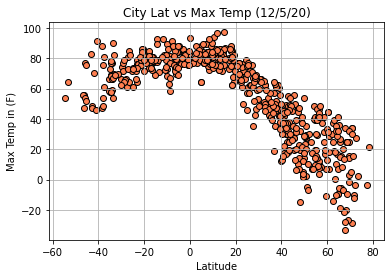

In [9]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max temp']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp in (F)')
plt.title('City Lat vs Max Temp (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_temp.png")
plt.show()


## Latitude vs. Humidity Plot

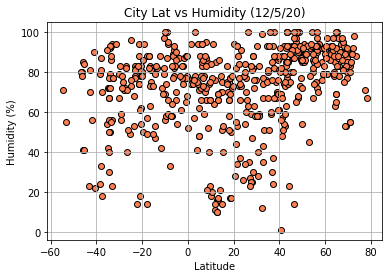

In [10]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Lat vs Humidity (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

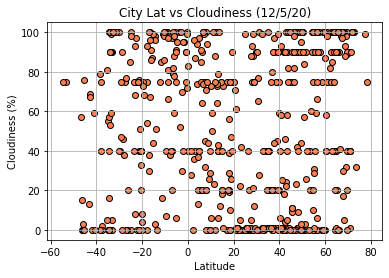

In [11]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Lat vs Cloudiness (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

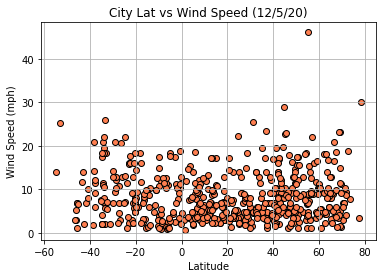

In [12]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Lat vs Wind Speed (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_wind_speed.png")
plt.show()


## Linear Regression

In [13]:
northern_df = clean_city_data[clean_city_data["Lat"]>0]

southern_df = clean_city_data[clean_city_data["Lat"]<0]

print(f"There are {northern_df.City.count()} cities in the northern hemisphere")
print(f"There are {southern_df.City.count()} cities in the southern hemisphere")

There are 382 cities in the northern hemisphere
There are 167 cities in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7722025017479294


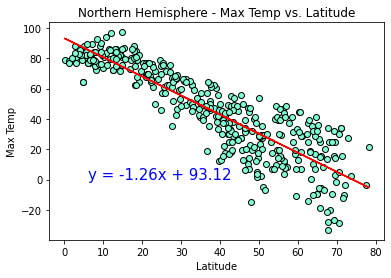

In [21]:
x_values = northern_df['Lat']
y_values = northern_df['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3330968901615126


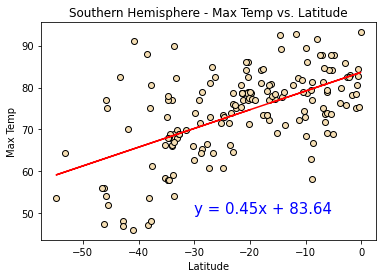

In [23]:
x_values = southern_df['Lat']
y_values = southern_df['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15160190404634538


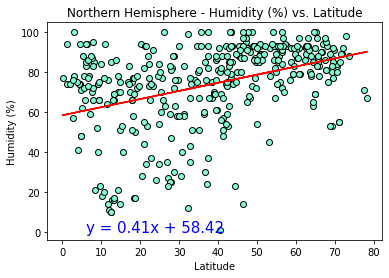

In [24]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.050025551940681035


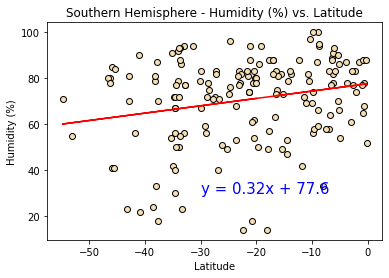

In [25]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Southern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03026766639272531


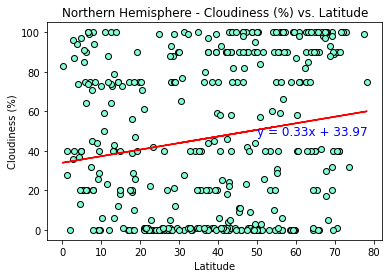

In [29]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,48),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13827022690892393


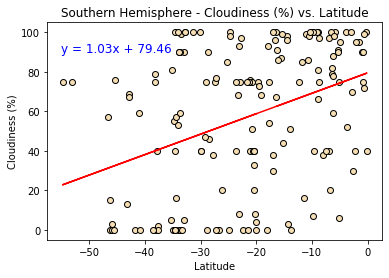

In [33]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Southern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026675812977705656


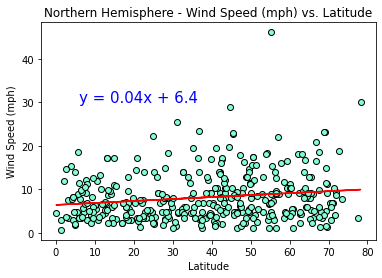

In [36]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025007870537126557


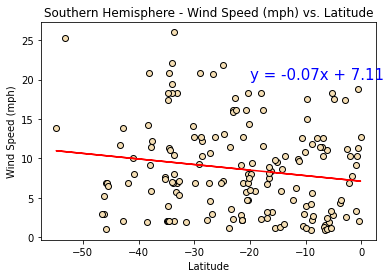

In [38]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()